In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [ ]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(df.info())
print(df.shape)
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
(891, 12)
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
d

In [ ]:
df.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)
print(df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch
0         0       3    male  22.0      1      0
1         1       1  female  38.0      1      0
2         1       3  female  26.0      0      0
3         1       1  female  35.0      1      0
4         0       3    male  35.0      0      0


In [ ]:
df['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


<function matplotlib.pyplot.show(close=None, block=None)>

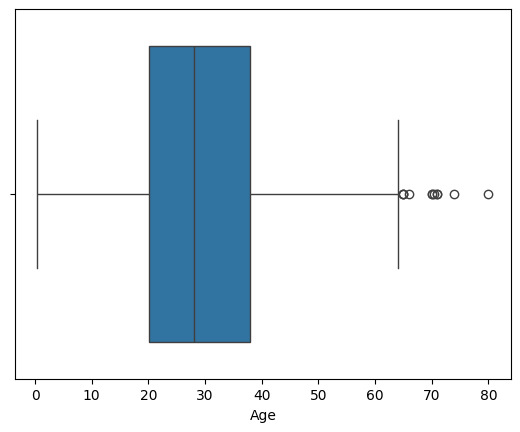

In [ ]:
sns.boxplot(data=df,x='Age')
plt.show()

In [ ]:
df['Age'].fillna(29,inplace=True)
print(df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch
0         0       3    male  22.0      1      0
1         1       1  female  38.0      1      0
2         1       3  female  26.0      0      0
3         1       1  female  35.0      1      0
4         0       3    male  35.0      0      0


/tmp/ipython-input-38-4251399592.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(29,inplace=True)


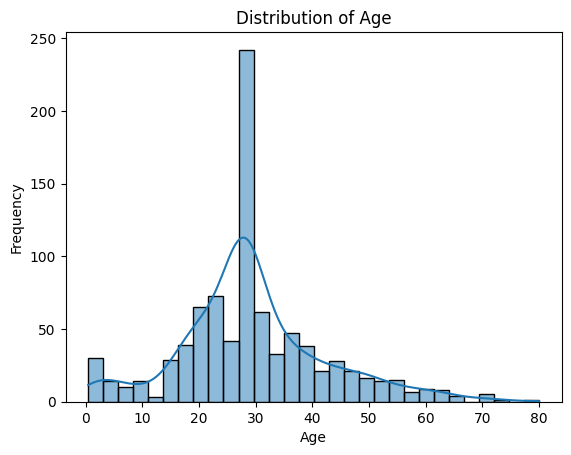

In [ ]:
sns.histplot(df['Age'],kde=True,bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
dummies=pd.get_dummies(df['Sex'],dtype=int)
print(dummies)
dfm=pd.concat([df,dummies],axis=1)
dfm.drop(['Sex','male'],axis=1,inplace=True)
print(dfm.head())

     female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[891 rows x 2 columns]
   Survived  Pclass   Age  SibSp  Parch  female
0         0       3  22.0      1      0       0
1         1       1  38.0      1      0       1
2         1       3  26.0      0      0       1
3         1       1  35.0      1      0       1
4         0       3  35.0      0      0       0


<Axes: xlabel='SibSp', ylabel='Parch'>

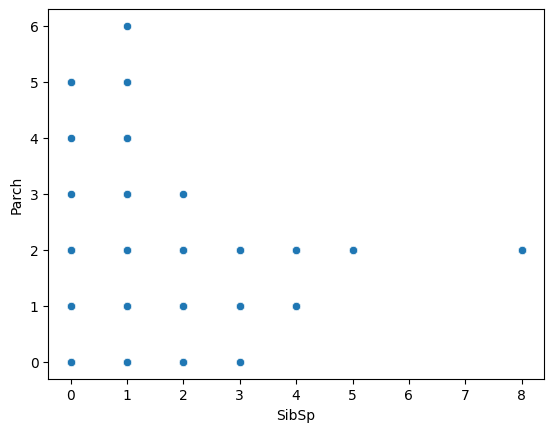

In [ ]:
sns.scatterplot(data=dfm,x='SibSp',y='Parch')
plt.show()

In [ ]:
dfm['FamilySize']=dfm['SibSp']+dfm['Parch']
dfm['IsAlone']=(dfm['FamilySize']==1).astype(int)

In [ ]:

dfm.drop(['SibSp','Parch'],axis=1,inplace=True)
dfm.head()

,Survived,Pclass,Age,female,FamilySize,IsAlone
0,0,3,22.0,0,1,1
1,1,1,38.0,1,1,1
2,1,3,26.0,1,0,0
3,1,1,35.0,1,1,1
4,0,3,35.0,0,0,0


In [ ]:
x=dfm.drop('Survived',axis=1)
y=dfm['Survived']
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)